# Imports

In [2]:
import nrrd
import matplotlib.pyplot as plt
import os
%matplotlib widget

# Data read

In [2]:
roi_folder_path = "../../../shared_data/NSCLC_Radiogenomics/Liver_ROI/"
file_name = "R01-104"
pet_folder_path = "../../../shared_data/NSCLC_Radiogenomics/images/" + file_name + "/pet/"
file_names = os.listdir(roi_folder_path)

# for temp_name in file_names:
#     temp_image, _ = nrrd.read(roi_folder_path + temp_name)
#     if temp_image.shape[2] < smallest_roi_z:
#         smallest_roi_z = temp_image.shape[2]

# print ('Smallest amount of slides: ', smallest_roi_z)

mask_file_name = file_name + "_pet_liver.nrrd"
mask_data, mask_header = nrrd.read(roi_folder_path + mask_file_name)

image_file_name = file_name + "_pet_image.nrrd"
image_data, image_header = nrrd.read(pet_folder_path + image_file_name)


data = image_data * mask_data
print(data.shape)

(192, 192, 263)


In [ ]:
# print("Voxel spacings (mm):", header.get("spacings", "Unknown"))
# print("Data type:", data.dtype)
# print("Intensity range:", data.min(), "to", data.max())

# Graficos

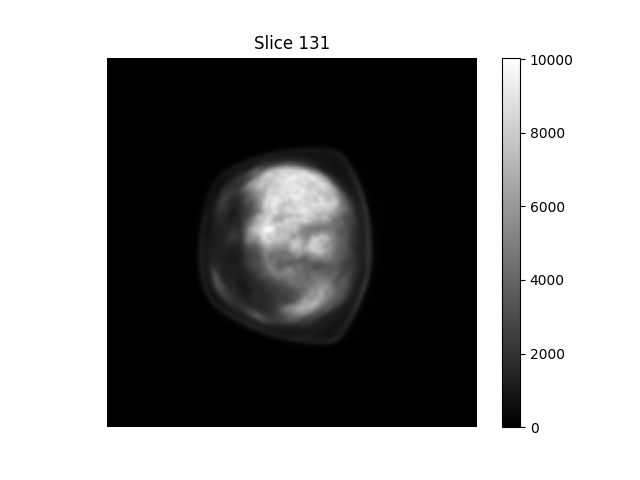

In [5]:
import matplotlib.pyplot as plt

lung_folder_path = "../../../shared_data/NSCLC_Radiogenomics/images/"
lung_folder = lung_folder_path + file_name + "/pet/"
lung_file = lung_folder + file_name + "_pet_image.nrrd"

lung_data, lung_heaeder = nrrd.read(lung_file)

if len(lung_data.shape) == 3:
    slice_idx = lung_data.shape[2] // 2  # Middle slice for z-axis
    plt.imshow(lung_data[:, :, slice_idx], cmap='gray')  # Adjust colormap as needed
    plt.colorbar()
    plt.title(f'Slice {slice_idx}')
    plt.axis('off')
    plt.show()
elif len(lung_data.shape) == 2:
    plt.imshow(lung_data, cmap='gray')
    plt.colorbar()
    plt.axis('off')
    plt.show()

## Sliders

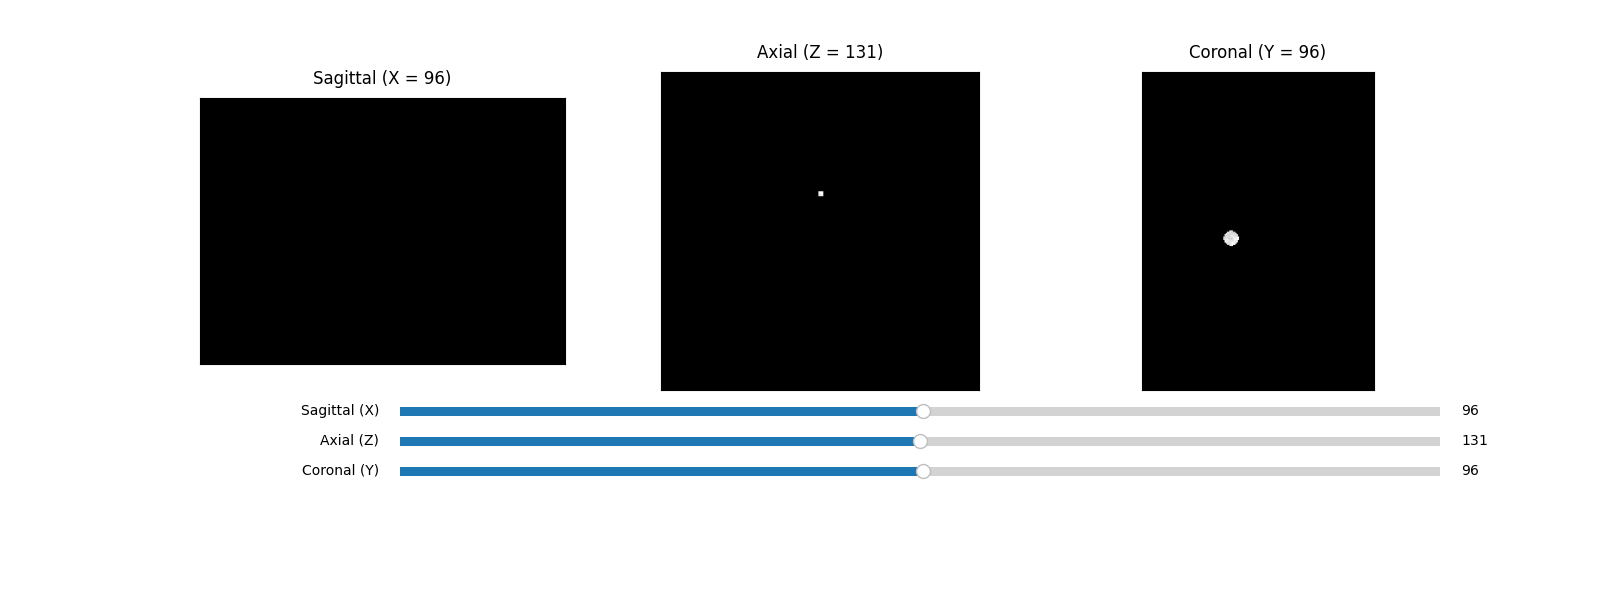

In [6]:
from matplotlib.widgets import Slider

# Create figure with 3 subplots in anatomical order
fig, (ax_sagittal, ax_axial, ax_coronal) = plt.subplots(1, 3, figsize=(16, 6))
plt.subplots_adjust(bottom=0.35)  # Adjusted space for sliders

# Initial slices (middle of each dimension)
sagittal_idx = data.shape[0] // 2  # X-axis
axial_idx = data.shape[2] // 2     # Z-axis
coronal_idx = data.shape[1] // 2   # Y-axis

# Plot initial views with proper orientation
img_sagittal = ax_sagittal.imshow(data[sagittal_idx, :, :], cmap='gray')  # Sagittal (Y-Z)
img_axial = ax_axial.imshow(data[:, :, axial_idx], cmap='gray')           # Axial (X-Y)
img_coronal = ax_coronal.imshow(data[:, coronal_idx, :].T, cmap='gray')   # Coronal (X-Z, transposed)

# Set titles with anatomical labels
ax_sagittal.set_title(f"Sagittal (X = {sagittal_idx})", fontsize=12, pad=10)
ax_axial.set_title(f"Axial (Z = {axial_idx})", fontsize=12, pad=10)
ax_coronal.set_title(f"Coronal (Y = {coronal_idx})", fontsize=12, pad=10)

# Remove axis ticks for cleaner display
for ax in [ax_sagittal, ax_axial, ax_coronal]:
    ax.set_xticks([])
    ax.set_yticks([])

# Slider configuration
slider_height = 0.03
slider_bottom = 0.2
slider_spacing = 0.05

# SAGITTAL SLIDER (X-axis)
ax_slider_x = plt.axes([0.25, slider_bottom + 2*slider_spacing, 0.65, slider_height])
slider_x = Slider(ax_slider_x, 'Sagittal (X)', 0, data.shape[0]-1, valinit=sagittal_idx)

# AXIAL SLIDER (Z-axis)
ax_slider_z = plt.axes([0.25, slider_bottom + slider_spacing, 0.65, slider_height])
slider_z = Slider(ax_slider_z, 'Axial (Z)', 0, data.shape[2]-1, valinit=axial_idx)

# CORONAL SLIDER (Y-axis)
ax_slider_y = plt.axes([0.25, slider_bottom, 0.65, slider_height])
slider_y = Slider(ax_slider_y, 'Coronal (Y)', 0, data.shape[1]-1, valinit=coronal_idx)

# Update functions
def update_sagittal(val):
    x = int(slider_x.val)
    img_sagittal.set_data(data[x, :, :])
    ax_sagittal.set_title(f"Sagittal (X = {x})")
    fig.canvas.draw_idle()

def update_axial(val):
    z = int(slider_z.val)
    img_axial.set_data(data[:, :, z])
    ax_axial.set_title(f"Axial (Z = {z})")
    fig.canvas.draw_idle()

def update_coronal(val):
    y = int(slider_y.val)
    img_coronal.set_data(data[:, y, :].T)
    ax_coronal.set_title(f"Coronal (Y = {y})")
    fig.canvas.draw_idle()

# Connect sliders
slider_x.on_changed(update_sagittal)
slider_z.on_changed(update_axial)
slider_y.on_changed(update_coronal)

plt.show()

## 3D

In [9]:
import itk
import ipyvolume as ipv
import numpy as np

# 1. Load your NRRD file
image = itk.imread(pet_folder_path + file_name + "_pet_segmentation.nrrd")
data_array = itk.array_from_image(image)

# 2. Normalize data to 0-1 range (important for visualization)
normalized_data = (data_array - np.min(data_array)) / (np.max(data_array) - np.min(data_array))

# 3. Create the 3D volume visualization
ipv.figure(width=800, height=600)
vol = ipv.volshow(
    normalized_data,
    level=[0.1, 0.5, 0.9],  # Adjust these thresholds for better visibility
    opacity=[0.01, 0.05, 0.1],  # Adjust opacity scaling
    controls=True,  # Adds interactive controls
    extent=[[0, 192], [0, 192], [0, 236]]  # Sets correct physical dimensions
)

# 4. Add labels and adjust view
ipv.xlabel('X axis')
ipv.ylabel('Y axis')
ipv.zlabel('Z axis')
ipv.style.use('dark')  # Try 'light' if preferred
ipv.show()

invalid value encountered in cast


Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.1, max=1.0, step…

# Predict

In [6]:
from load_frozen_model import build_transformer, add_mode
from config_manager import load_conf
from pathlib import Path
import torch

# Get model pth
model_name = "None_transformer_stanford/petct/kfold_0"
model_path = Path("../../vit-deep-radiomics-online1/models/petct_online") / model_name / "model_epoch_0000.pth"

cfg = load_conf()
arch = "transformer"
modality = "petct"
modality_a = "pet"
modality_b = "ct"
num_classes = 2

model_weights = torch.load(model_path, map_location="cpu", weights_only=True)

In [24]:
params = {}
important_keys = ("cls_token", "transformer_encoder", "norm")
for k, v in model_weights.items():
    if any(important_key in k for important_key in important_keys):
        params[k] = v

In [ ]:
for i in params.keys():
    print(i)

cls_token_ct
cls_token_pet
transformer_encoder_ct.layers.0.self_attn.in_proj_weight
transformer_encoder_ct.layers.0.self_attn.in_proj_bias
transformer_encoder_ct.layers.0.self_attn.out_proj.weight
transformer_encoder_ct.layers.0.self_attn.out_proj.bias
transformer_encoder_ct.layers.0.linear1.weight
transformer_encoder_ct.layers.0.linear1.bias
transformer_encoder_ct.layers.0.linear2.weight
transformer_encoder_ct.layers.0.linear2.bias
transformer_encoder_ct.layers.0.norm1.weight
transformer_encoder_ct.layers.0.norm1.bias
transformer_encoder_ct.layers.0.norm2.weight
transformer_encoder_ct.layers.0.norm2.bias
transformer_encoder_ct.layers.1.self_attn.in_proj_weight
transformer_encoder_ct.layers.1.self_attn.in_proj_bias
transformer_encoder_ct.layers.1.self_attn.out_proj.weight
transformer_encoder_ct.layers.1.self_attn.out_proj.bias
transformer_encoder_ct.layers.1.linear1.weight
transformer_encoder_ct.layers.1.linear1.bias
transformer_encoder_ct.layers.1.linear2.weight
transformer_encoder_ct

In [ ]:
import os
from pathlib import Path
from load_frozen_model import load_frozen_transformers 

# Get model pth
model_name = "none_transformer_stanford/pet/kfold_0"
model_path = Path("../models/petct_online") / model_name / "best_model_epoch.pth"


# Get image to predict
hdf5_path = "../../Data/lung_radiomics_datasets.hdf5"

load_frozen_transformers(cfg, )

Valid model file exists
